author : sybyeon1102@gmail.com

## import

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
from matplotlib import rc
rc('font', family='Malgun Gothic') # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호출력 설정

In [162]:
from warnings import filterwarnings
filterwarnings('ignore')

# WHtR와 각 컬럼과의 상관계수

- bmi (0.82), 
- ALT (0.35),
- 감마지티피(0.27), 혈압 (0.21/0.21), AST(0.16)

In [163]:
df = pd.read_pickle('./WHtR_concat/02/reduction_04.pkl')

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57903 entries, 0 to 57902
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   신장(5Cm단위)   57903 non-null  float64
 1   체중(5Kg 단위)  57903 non-null  float64
 2   허리둘레        57903 non-null  float64
 3   수축기 혈압      57903 non-null  float64
 4   이완기 혈압      57903 non-null  float64
 5   식전혈당(공복혈당)  57903 non-null  float64
 6   (혈청지오티)AST  57903 non-null  float64
 7   (혈청지오티)ALT  57903 non-null  float64
 8   감마 지티피      57903 non-null  float64
 9   흡연상태        57903 non-null  float64
 10  음주여부        57903 non-null  float64
 11  bmi         57903 non-null  float64
 12  WHtR        57903 non-null  float64
dtypes: float64(13)
memory usage: 5.7 MB


In [165]:
df.head()

,신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,bmi,WHtR
0,165.0,60.0,72.1,127.0,79.0,90.0,21.0,27.0,21.0,1.0,0.0,22.0,0.437
1,185.0,85.0,94.0,114.0,72.0,86.0,25.0,32.0,26.0,3.0,1.0,24.8,0.508
2,165.0,55.0,77.5,130.0,70.0,87.0,18.0,10.0,15.0,1.0,0.0,20.2,0.470
3,165.0,75.0,84.0,139.0,80.0,92.0,27.0,30.0,25.0,2.0,1.0,27.5,0.509
4,175.0,70.0,83.0,110.0,70.0,120.0,19.0,14.0,25.0,3.0,1.0,22.9,0.474


In [166]:
df1 = df.copy()

<AxesSubplot:>

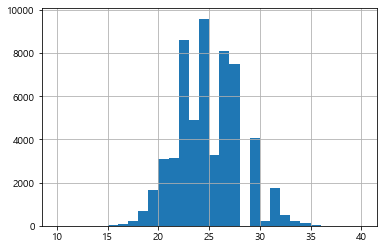

In [167]:
df1.bmi.hist(range=(10, 40), bins=30)

<AxesSubplot:>

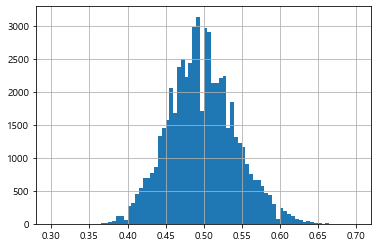

In [168]:
df1.WHtR.hist(range=(0.3, 0.7), bins=80)

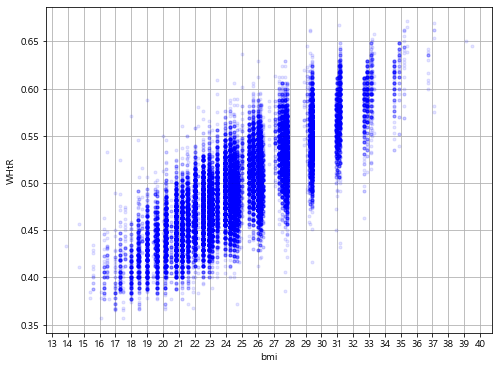

In [169]:
plt.figure(figsize=(8, 6))
plt.plot(df1.bmi, df1.WHtR, 'b.', alpha=0.1)
plt.xticks(range(13, 41))
plt.xlabel('bmi')
plt.ylabel('WHtR')
plt.grid()

In [170]:
df1['bmi_int'] = df1.bmi.round()
df1.head()

,신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,bmi,WHtR,bmi_int
0,165.0,60.0,72.1,127.0,79.0,90.0,21.0,27.0,21.0,1.0,0.0,22.0,0.437,22.0
1,185.0,85.0,94.0,114.0,72.0,86.0,25.0,32.0,26.0,3.0,1.0,24.8,0.508,25.0
2,165.0,55.0,77.5,130.0,70.0,87.0,18.0,10.0,15.0,1.0,0.0,20.2,0.470,20.0
3,165.0,75.0,84.0,139.0,80.0,92.0,27.0,30.0,25.0,2.0,1.0,27.5,0.509,28.0
4,175.0,70.0,83.0,110.0,70.0,120.0,19.0,14.0,25.0,3.0,1.0,22.9,0.474,23.0


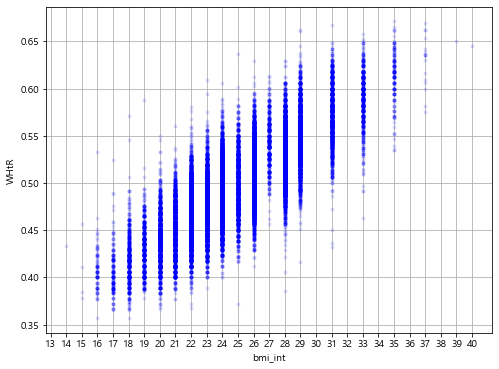

In [171]:
plt.figure(figsize=(8, 6))
plt.plot(df1.bmi_int, df1.WHtR, 'b.', alpha=0.1)
plt.xticks(range(13, 41))
plt.xlabel('bmi_int')
plt.ylabel('WHtR')
plt.grid()

# 테스트 : histogram 과 weight list

In [172]:
df1.bmi.median()

24.5

- bmi == 24

In [173]:
whtr = df1[df1.bmi_int == 24.0].WHtR
whtr

13       0.497
14       0.497
16       0.512
18       0.469
54       0.462
         ...  
57875    0.509
57877    0.471
57880    0.503
57885    0.483
57886    0.469
Name: WHtR, Length: 10601, dtype: float64

<AxesSubplot:>

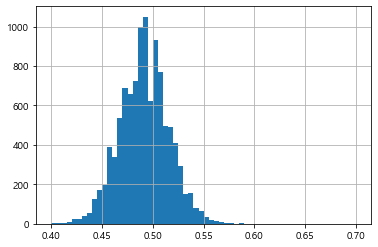

In [174]:
whtr.hist(range=(0.4, 0.7), bins=60)

In [175]:
y, x = np.histogram(whtr, range=(0.4, 0.7), bins=60)

In [176]:
y.shape, x.shape

((60,), (61,))

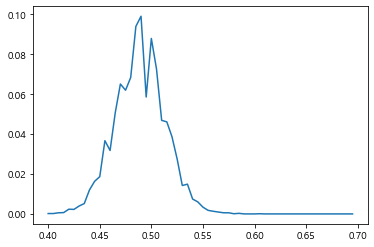

In [177]:
plt.plot(x[:-1], y/y.sum())

In [178]:
repro = np.random.choice(x[:-1], p=y/y.sum(), size=10000)

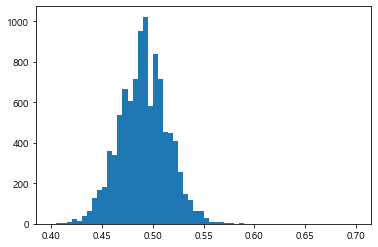

In [179]:
plt.hist(repro, range=(0.4, 0.7), bins=60)
plt.show()

In [180]:
y1, x1 = np.histogram(repro, range=(0.4, 0.7), bins=60)

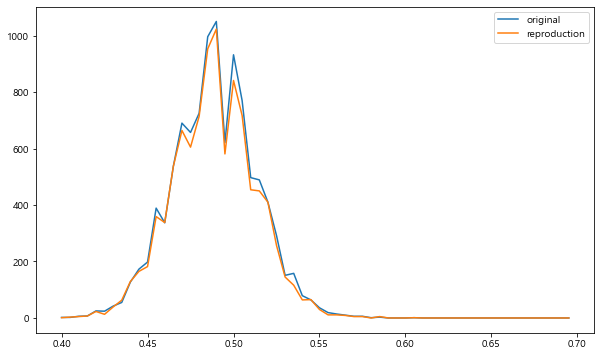

In [181]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(x[:-1], y, label='original')
ax.plot(x1[:-1], y1, label='reproduction')
ax.legend()

plt.show()

- 기존 분포가 잘 재현됨

In [182]:
df2 = df1.copy()

In [183]:
df2.head()

,신장(5Cm단위),체중(5Kg 단위),허리둘레,수축기 혈압,이완기 혈압,식전혈당(공복혈당),(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,bmi,WHtR,bmi_int
0,165.0,60.0,72.1,127.0,79.0,90.0,21.0,27.0,21.0,1.0,0.0,22.0,0.437,22.0
1,185.0,85.0,94.0,114.0,72.0,86.0,25.0,32.0,26.0,3.0,1.0,24.8,0.508,25.0
2,165.0,55.0,77.5,130.0,70.0,87.0,18.0,10.0,15.0,1.0,0.0,20.2,0.470,20.0
3,165.0,75.0,84.0,139.0,80.0,92.0,27.0,30.0,25.0,2.0,1.0,27.5,0.509,28.0
4,175.0,70.0,83.0,110.0,70.0,120.0,19.0,14.0,25.0,3.0,1.0,22.9,0.474,23.0


# 안쓰는 columns DROP

- 쓰는 컬럼:
    - bmi (0.82), 
    - ALT (0.35),
    - 감마지티피(0.27), 혈압 (0.21/0.21), AST(0.16)
    - (+) WHtR

In [184]:
df2 = df2.loc[:, ['bmi_int', '(혈청지오티)ALT', '감마 지티피', '수축기 혈압', '이완기 혈압', '(혈청지오티)AST', 'WHtR']]
df2.head(3)

,bmi_int,(혈청지오티)ALT,감마 지티피,수축기 혈압,이완기 혈압,(혈청지오티)AST,WHtR
0,22.0,27.0,21.0,127.0,79.0,21.0,0.437
1,25.0,32.0,26.0,114.0,72.0,25.0,0.508
2,20.0,10.0,15.0,130.0,70.0,18.0,0.470


# 평균 혈압 계산

In [185]:
df3 = df2.copy()

In [186]:
df3.columns

Index(['bmi_int', '(혈청지오티)ALT', '감마 지티피', '수축기 혈압', '이완기 혈압', '(혈청지오티)AST',
       'WHtR'],
      dtype='object')

In [187]:
df3['평균 혈압'] = (df3['수축기 혈압'] + df3['이완기 혈압'])/2.0

In [188]:
df3.head(2)

,bmi_int,(혈청지오티)ALT,감마 지티피,수축기 혈압,이완기 혈압,(혈청지오티)AST,WHtR,평균 혈압
0,22.0,27.0,21.0,127.0,79.0,21.0,0.437,103.0
1,25.0,32.0,26.0,114.0,72.0,25.0,0.508,93.0


In [189]:
df3['평균 혈압'].value_counts()

100.0    2716
90.0     2339
105.0    2315
95.0     1885
98.0     1694
         ... 
129.5       7
74.0        5
73.0        2
73.5        1
130.0       1
Name: 평균 혈압, Length: 115, dtype: int64

# 값 구성 체크

In [190]:
df3.columns

Index(['bmi_int', '(혈청지오티)ALT', '감마 지티피', '수축기 혈압', '이완기 혈압', '(혈청지오티)AST',
       'WHtR', '평균 혈압'],
      dtype='object')

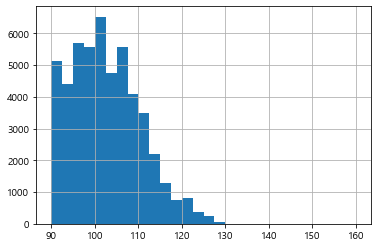

100.0    6522
95.0     5700
97.5     5572
105.0    5562
90.0     5138
102.5    4739
92.5     4406
107.5    4082
110.0    3481
87.5     2254
112.5    2207
85.0     2131
115.0    1283
82.5     1097
80.0     1052
120.0     798
117.5     763
122.5     356
77.5      299
125.0     255
75.0      122
127.5      67
72.5       16
130.0       1
Name: 평균 혈압, dtype: int64

In [191]:
bns10 = 4
df3['평균 혈압'].hist(range=(90, 160), bins=7*bns10)
plt.show()

y, x = np.histogram(df3['평균 혈압'], range=(90, 160), bins=7*bns10)

((df3['평균 혈압']//(10/bns10))*(10/bns10)).value_counts()

## AST

In [192]:
df4 = df3.copy()

In [193]:
df4.columns

Index(['bmi_int', '(혈청지오티)ALT', '감마 지티피', '수축기 혈압', '이완기 혈압', '(혈청지오티)AST',
       'WHtR', '평균 혈압'],
      dtype='object')

In [194]:
df4['(혈청지오티)AST'].value_counts()

21.0    4014
22.0    3987
20.0    3887
23.0    3839
24.0    3643
19.0    3578
25.0    3354
18.0    3204
26.0    2927
27.0    2616
17.0    2571
28.0    2299
29.0    2064
16.0    1904
30.0    1730
31.0    1499
15.0    1321
32.0    1249
33.0    1126
34.0     918
14.0     806
35.0     802
36.0     629
37.0     562
13.0     466
38.0     459
39.0     432
40.0     348
41.0     265
42.0     252
12.0     226
43.0     202
44.0     173
45.0     144
46.0     128
47.0     108
11.0      91
10.0      44
9.0       16
8.0       10
7.0        3
6.0        3
5.0        2
4.0        1
27.3       1
Name: (혈청지오티)AST, dtype: int64

<AxesSubplot:>

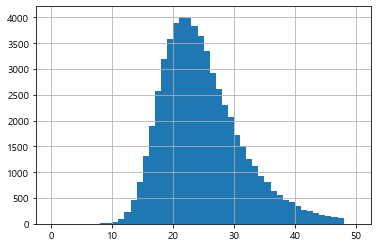

In [195]:
df4['(혈청지오티)AST'].hist(range=(0, 50), bins=50)

## ALT

In [196]:
df4['(혈청지오티)ALT'].unique()

array([27., 32., 10., 30., 14., 33., 15., 36., 26., 19., 46., 49., 41.,
       24., 17., 22., 29., 25., 18., 28., 23., 21., 50., 11., 39., 12.,
       40., 16., 57., 31., 43., 20., 38., 48., 37., 58., 34., 55., 35.,
       42., 51.,  8., 64., 62., 52., 13., 44.,  6.,  9., 53., 45.,  3.,
       59.,  7., 61., 54., 47., 56., 60., 63.,  5.,  1.,  4.,  2.])

<AxesSubplot:>

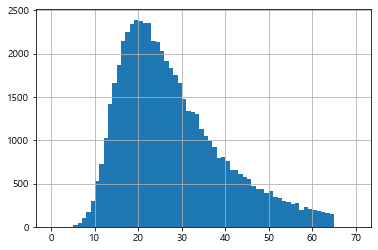

In [197]:
df4['(혈청지오티)ALT'].hist(range=(0, 70), bins=70)

## 감마 지티피

In [198]:
df4.columns

Index(['bmi_int', '(혈청지오티)ALT', '감마 지티피', '수축기 혈압', '이완기 혈압', '(혈청지오티)AST',
       'WHtR', '평균 혈압'],
      dtype='object')

In [199]:
df4['감마 지티피'].unique()

array([21., 26., 15., 25., 54., 47., 59., 19., 18., 27., 22., 32., 10.,
       38., 74., 42., 20., 23., 14., 65., 28., 33., 62., 37., 35., 24.,
       30., 31., 11., 58., 88., 86., 36., 56., 17., 51., 55., 48., 29.,
       46., 53., 49., 52., 79., 50., 40., 76., 57., 80., 34., 63., 12.,
       16., 39., 77., 91., 83., 87., 13., 71., 64., 66.,  9., 43., 90.,
       68., 61., 45., 73., 69., 75., 93., 41., 78., 60., 44., 67., 72.,
       84., 81.,  6., 94., 70., 89.,  3.,  8.,  5., 92., 82., 85.,  4.,
        7.,  1.,  2.])

- bmi (0.82), 
- ALT (0.35),
- 감마지티피(0.27), 혈압 (0.21/0.21), AST(0.16)

# 그룹화

In [200]:
df5 = df4.copy()
df5.drop(columns=['수축기 혈압', '이완기 혈압'], inplace=True)

## 불러오기

In [201]:
df = pd.read_pickle('./WHtR_concat/03/reduction_05.pkl')
df.head()

,bmi_int,(혈청지오티)ALT,감마 지티피,(혈청지오티)AST,WHtR,평균 혈압
0,22.0,27.0,21.0,21.0,0.437,103.0
1,25.0,32.0,26.0,25.0,0.508,93.0
2,20.0,10.0,15.0,18.0,0.470,100.0
3,28.0,30.0,25.0,27.0,0.509,109.5
4,23.0,14.0,25.0,19.0,0.474,90.0


In [202]:
df.rename(columns=dict(zip(df.columns, ['bmi', 'ALT', 'r_GTP', 'AST', 'WHtR', 'avg_bp'])), inplace=True)
df.head()

,bmi,ALT,r_GTP,AST,WHtR,avg_bp
0,22.0,27.0,21.0,21.0,0.437,103.0
1,25.0,32.0,26.0,25.0,0.508,93.0
2,20.0,10.0,15.0,18.0,0.470,100.0
3,28.0,30.0,25.0,27.0,0.509,109.5
4,23.0,14.0,25.0,19.0,0.474,90.0


## 1차 그룹화 bmi

### 히스토그램

In [203]:
df.bmi.describe()

count    57903.000000
mean        24.810562
std          3.119933
min         14.000000
25%         23.000000
50%         24.000000
75%         26.000000
max         40.000000
Name: bmi, dtype: float64

In [204]:
df.bmi.count()

57903

<AxesSubplot:>

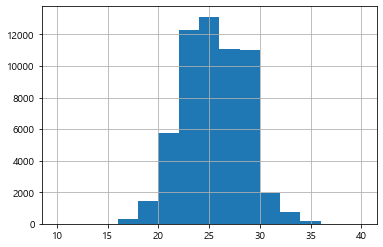

In [205]:
interval = 2
df.bmi.hist(range=(10, 40), bins=int(30/interval))

- 최소 간격 : 2

In [206]:
df1 = df.copy()
df1['bmi_c'] = ((df.bmi//interval)*interval)

In [207]:
df1.head()

,bmi,ALT,r_GTP,AST,WHtR,avg_bp,bmi_c
0,22.0,27.0,21.0,21.0,0.437,103.0,22.0
1,25.0,32.0,26.0,25.0,0.508,93.0,24.0
2,20.0,10.0,15.0,18.0,0.470,100.0,20.0
3,28.0,30.0,25.0,27.0,0.509,109.5,28.0
4,23.0,14.0,25.0,19.0,0.474,90.0,22.0


In [208]:
vc = df1.bmi_c.value_counts()
vc

24.0    13127
22.0    12311
26.0    11087
28.0    11002
20.0     5751
30.0     1955
18.0     1453
32.0      717
16.0      299
34.0      177
36.0       17
14.0        5
40.0        1
38.0        1
Name: bmi_c, dtype: int64

In [209]:
vc = vc.sort_index()

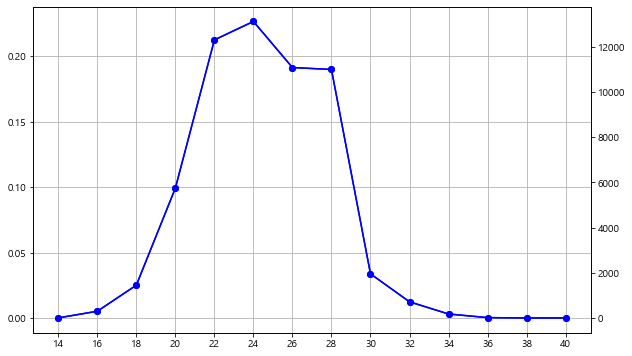

In [210]:
fig = plt.figure(figsize=(10, 6))
ax= fig.add_subplot(111)

ax.plot(vc.index, vc.values/vc.sum(), 'bo-')
ax2 = ax.twinx()
ax2.plot(vc.index, vc.values, 'bo-')

ax.set_xticks(vc.index)
ax.grid()
plt.show()

- 18이하/ 30이상 묶기

### WHtR 변화

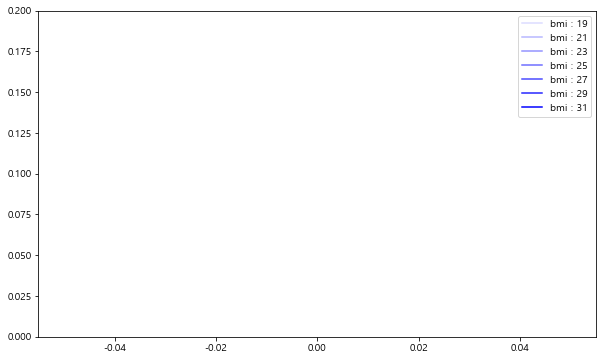

In [371]:
li_bmi = list(range(19, 32, 2))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for i, b_val in enumerate(li_bmi):
    y1, x1 = np.histogram(df1[df1.bmi_c == b_val].WHtR, range=(0.35, 0.7), bins=30)
    ax.plot(x1[:-1], y1/y1.sum(), 'b-', alpha=(i+1)/len(li_bmi), label=f'bmi : {b_val}')

ax.legend()
ax.set_ylim(0, 0.20)
plt.show()

## 2차 그룹화 ALT

### 히스토그램

In [212]:
interval=5

<AxesSubplot:>

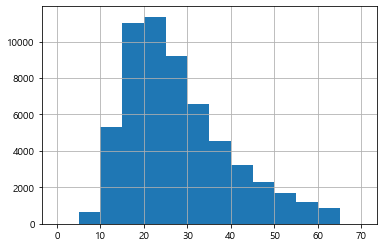

In [213]:
df1.ALT.hist(range=(0, 70), bins=7*int(10/interval))

In [214]:
np.sort(df1.ALT.unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.])

In [215]:
df2 = df1.copy()

In [216]:
df2['ALT_c']=(df1.ALT//5)*5

In [217]:
df2.ALT_c.value_counts().sort_index()

0.0         7
5.0       633
10.0     5337
15.0    11000
20.0    11367
25.0     9184
30.0     6567
35.0     4562
40.0     3247
45.0     2287
50.0     1682
55.0     1178
60.0      852
Name: ALT_c, dtype: int64

- 10이하/45이상

### WHtR변화

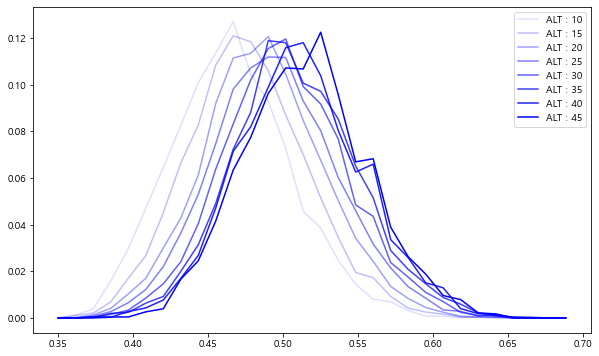

In [218]:
li_alt = list(range(10, 45+1, 5))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

for i, al_val in enumerate(li_alt):
    y1, x1 = np.histogram(df2[df2.ALT_c == al_val].WHtR, range=(0.35, 0.7), bins=30)
    ax.plot(x1[:-1], y1/y1.sum(), 'b-', alpha=(i+1)/len(li_alt), label=f'ALT : {al_val}')

ax.legend()
# ax.set_ylim(0, 0.20)
plt.show()

## bmi+ALT 그룹화

In [228]:
df3 = pd.read_pickle('./WHtR_concat/03/reduction_06.pkl')
df3.head(3)

,bmi,ALT,r_GTP,AST,WHtR,avg_bp,bmi_c,ALT_c
0,22.0,27.0,21.0,21.0,0.437,103.0,22.0,25.0
1,25.0,32.0,26.0,25.0,0.508,93.0,24.0,30.0
2,20.0,10.0,15.0,18.0,0.470,100.0,20.0,10.0


In [229]:
df3.drop(columns=['bmi', 'ALT'], inplace=True)

In [230]:
df3.head(2)

,r_GTP,AST,WHtR,avg_bp,bmi_c,ALT_c
0,21.0,21.0,0.437,103.0,22.0,25.0
1,26.0,25.0,0.508,93.0,24.0,30.0


### bmi 끝값 처리

- bmi : 18이하/ 30이상 묶기

In [231]:
np.sort(df3.bmi_c.unique())

array([14., 16., 18., 20., 22., 24., 26., 28., 30., 32., 34., 36., 38.,
       40.])

In [232]:
df4 = df3.copy()

In [233]:
def edge_bmi(x):
    if x < 18.0:
        return 18.0
    elif x > 30.0:
        return 30.0
    else:
        return x

In [236]:
df4.bmi_c = df4.bmi_c.apply(lambda x : edge_bmi(x))

In [238]:
np.sort(df4.bmi_c.unique())

array([18., 20., 22., 24., 26., 28., 30.])

### ALT 끝값처리

- ALT : 10이하/45이상

In [240]:
np.sort(df3.ALT_c.unique())

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.])

In [241]:
def edge_ALT(x):
    if x < 10.0:
        return 10.0
    elif x > 45.0:
        return 45.0
    else:
        return x

In [242]:
df5 = df4.copy()

In [245]:
df5.ALT_c = df5.ALT_c.apply(lambda x : edge_ALT(x))

In [246]:
np.sort(df5.ALT_c.unique())

array([10., 15., 20., 25., 30., 35., 40., 45.])

### 그룹 key 저장

In [353]:
dic_keys = {}

In [355]:
li_b, li_al

([18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0],
 [10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0])

In [356]:
dic_keys['bmi'] = li_b
dic_keys['ALT'] = li_al

In [366]:
dic_keys['note'] = '''
- bmi
    - 18.0 에 대해, ALT 25.0 이상 묶기
    - 20.0 에 대해, ALT 35.0 이상 묶기
    - 30.0 에 대해, ALT 15.0 미만 묶기
'''

In [367]:
dic_keys

{'bmi': [18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0],
 'ALT': [10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0],
 'note': '\n- bmi\n    - 18.0 에 대해, ALT 25.0 이상 묶기\n    - 20.0 에 대해, ALT 35.0 이상 묶기\n    - 30.0 에 대해, ALT 15.0 미만 묶기\n'}

In [357]:
import pickle

In [369]:
with open('./WHtR_concat/03/keys.pkl', 'rb') as fr:
    test = pickle.load(fr)

In [370]:
test

{'bmi': [18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0],
 'ALT': [10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0],
 'note': '\n- bmi\n    - 18.0 에 대해, ALT 25.0 이상 묶기\n    - 20.0 에 대해, ALT 35.0 이상 묶기\n    - 30.0 에 대해, ALT 15.0 미만 묶기\n'}

### 그룹화

In [344]:
g1 = df5.groupby(by=['bmi_c', 'ALT_c'])

In [345]:
desc = g1.describe()['WHtR']

#### MEAN 확인

In [346]:
means = desc['mean']

In [347]:
li_b, li_al = [], []
for b, a in means.index:
    li_b.append(b)
    li_al.append(a)
li_b = list(set(li_b))
li_al = list(set(li_al))
li_b.sort() 
li_al.sort()
li_b, li_al

([18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0],
 [10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0])

In [348]:
dic_means = {}
for b in li_b:
    li = []
    for al in li_al:
        li.append(means[(b, al)])
    dic_means[b] = li

In [349]:
df_means = pd.DataFrame(dic_means, index=li_al)
df_means

,18.0,20.0,22.0,24.0,26.0,28.0,30.0
10.0,0.418808,0.441722,0.464541,0.486702,0.505516,0.529970,0.573500
15.0,0.422319,0.445016,0.467341,0.488372,0.507639,0.532544,0.574503
20.0,0.422933,0.447485,0.470400,0.490705,0.509874,0.533858,0.575090
25.0,0.423870,0.447846,0.470987,0.492975,0.512545,0.536142,0.579002
30.0,0.429402,0.451702,0.473982,0.495609,0.513056,0.538755,0.576317
35.0,0.430100,0.453265,0.476771,0.495229,0.515757,0.539565,0.581461
40.0,0.427211,0.453718,0.476358,0.498272,0.515541,0.538486,0.578185
45.0,0.435130,0.456455,0.479439,0.499107,0.517143,0.542500,0.581262


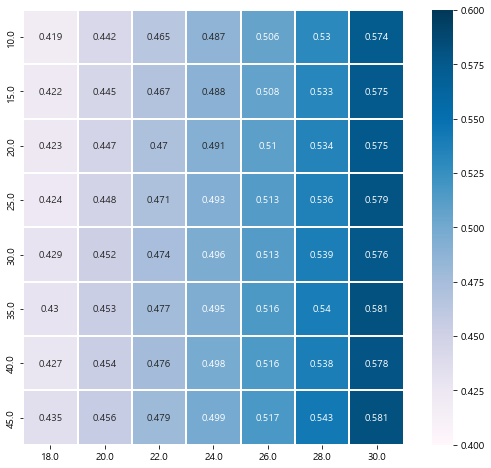

In [350]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
sns.heatmap(df_means, linewidths = 0.1, vmin=0.4, vmax = 0.6,
           square = True, cmap = colormap, linecolor = "white", annot = True, 
            annot_kws = {"size" : 10},  fmt='.3g',)
plt.show()

#### COUNT 확인

In [312]:
counts = desc['count']

In [318]:
dic_counts = {}
for b in li_b:
    li = []
    for al in li_al:
        li.append(counts[(b, al)])
    dic_counts[b] = li

In [319]:
df_counts = pd.DataFrame(dic_counts, index=li_al)
df_counts

,18.0,20.0,22.0,24.0,26.0,28.0,30.0
10.0,567.0,1232.0,1772.0,1243.0,672.0,433.0,58.0
15.0,524.0,1682.0,3060.0,2650.0,1688.0,1213.0,183.0
20.0,315.0,1193.0,2707.0,2814.0,2195.0,1798.0,345.0
25.0,177.0,734.0,1878.0,2232.0,1859.0,1878.0,426.0
30.0,92.0,399.0,1145.0,1496.0,1484.0,1554.0,397.0
35.0,40.0,211.0,698.0,931.0,1075.0,1247.0,360.0
40.0,19.0,124.0,422.0,672.0,724.0,946.0,340.0
45.0,23.0,176.0,629.0,1089.0,1390.0,1933.0,759.0


- max : 300

In [351]:
min_ = df_counts.min().min()
max_ = 300

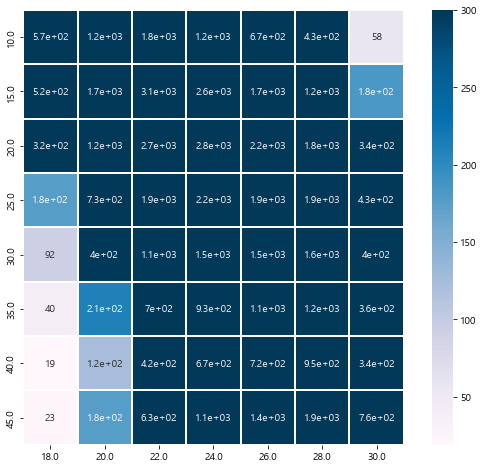

In [343]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
sns.heatmap(df_counts, linewidths = 0.1, vmin=min_, vmax = max_,
           square = True, cmap = colormap, linecolor = "white", annot = True, 
            annot_kws = {"size" : 10},  fmt='.2g')
plt.show()

- bmi
    - 18.0 에 대해, ALT 25.0 이상 묶기
    - 20.0 에 대해, ALT 35.0 이상 묶기
    - 30.0 에 대해, ALT 15.0 미만 묶기